# Dataset

In [1]:
from torchvision import datasets as dt
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# load the training data
mnist = dt.MNIST('data', train=True, download=True)
mnist = list(mnist)[:2500]

# load the training data as tensor
mnist_train = dt.MNIST('data', train=True, transform=transforms.ToTensor())
mnist_train = list(mnist_train)[:2500]

#split data into training and validation
mnist_train, mnist_val = mnist_train[:2000], mnist_train[2000:]

100%|██████████| 9912422/9912422 [00:00<00:00, 36161722.76it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 65408042.02it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33306643.60it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3831562.50it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



# Linear Model

In [15]:
#creating the model
simple_model = nn.Linear(28 * 28, 10)

# Train and Validate model

In [4]:
#Calculate the accuracy of the model
def get_accuracy(model, data):
  loader = torch.utils.data.DataLoader(data, batch_size=500)

  correct, total = 0, 0
  for xs, ts in loader:
      xs = xs.view(-1, 784) # flatten the image
      zs = model(xs)
      pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(ts.view_as(pred)).sum().item()
      total += int(ts.shape[0])
      return correct / total

In [16]:
def run_gradient_descent(model,batch_size=64,learning_rate=0.01,weight_decay=0,num_epochs=10):

  #define optimizer and loss function
  loss_func = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

  iters, train_losses, val_losses = [], [], []
  train_acc, val_acc = [] ,[]


  #load train and validation data
  train_loader = torch.utils.data.DataLoader(
      mnist_train,
      batch_size=batch_size,
      shuffle=True)

  val_loader = torch.utils.data.DataLoader(
      mnist_val,
      batch_size=batch_size,
      shuffle=True)


  for epoch in range(num_epochs):
    #training model
    model.train()
    counts = len(train_loader)
    loss_sum = 0
    for images, labels in train_loader:
      optimizer.zero_grad()
      images = images.view(-1, 784)
      loss = loss_func(model(images), labels)
      loss_sum +=loss.item()
      loss.backward()
      optimizer.step()

    #eval
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.view(-1, 784)
            test_loss += loss_func(model(images), labels).item()

    iters.append(epoch)
    train_losses.append(loss_sum / counts)
    val_losses.append(test_loss / len(val_loader))

    train_acc.append(get_accuracy(model, mnist_train))
    val_acc.append(get_accuracy(model, mnist_val))


  # plotting
  plt.title("Loss Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
  plt.plot(iters, train_losses, label="Train")
  plt.plot(iters, val_losses, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.legend(loc='best')
  plt.savefig('LossCurve.png')
  plt.show()

  plt.title("Accuracy Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
  plt.plot(iters, train_acc, label="Train")
  plt.plot(iters, val_acc, label="Validation")
  plt.xlabel("Iterations")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.savefig('AccuracyCurve.png')
  plt.show()

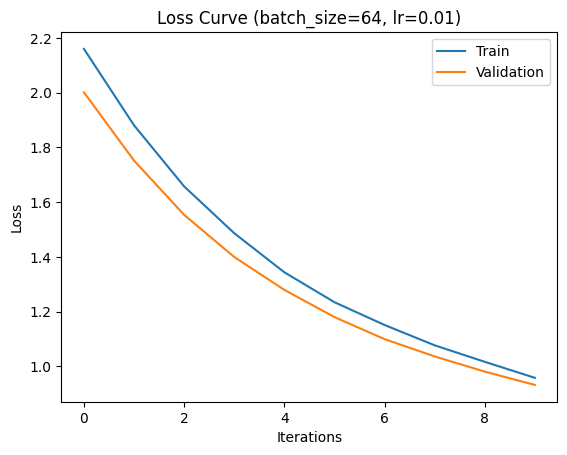

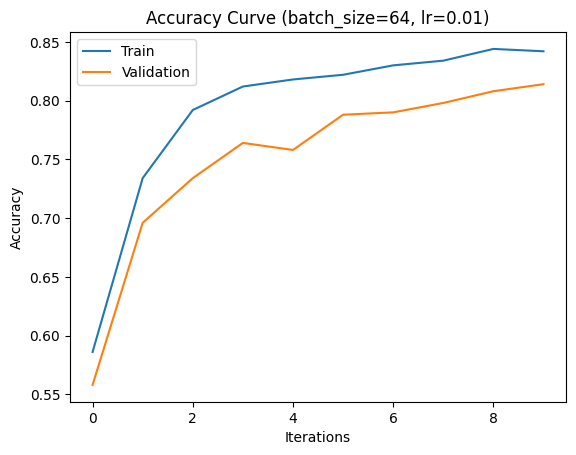

In [17]:
model = simple_model
run_gradient_descent(model, batch_size=64, learning_rate=0.01, num_epochs=10)

# Weights of classes

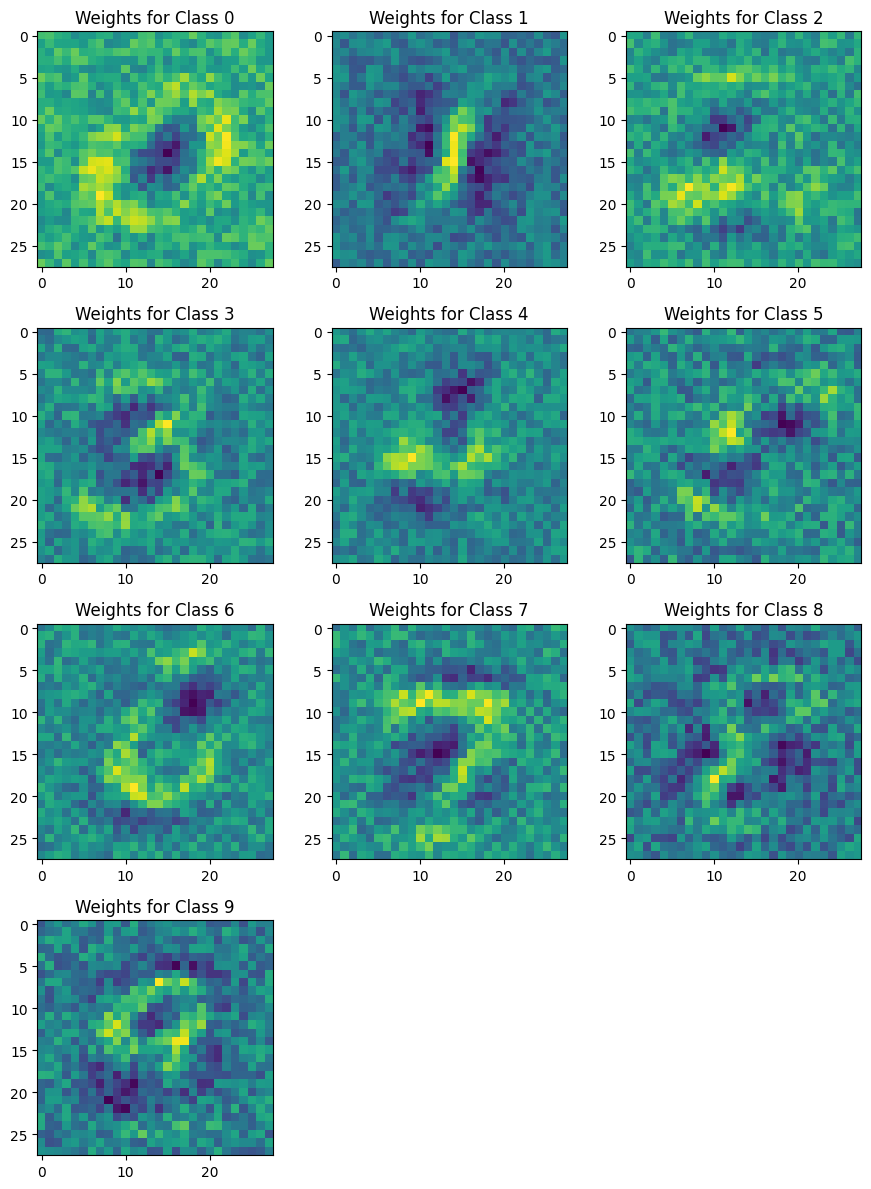

In [18]:
#weights
weight, bias = list(model.parameters())

#plotting
figure, axis = plt.subplots(4, 3, figsize=(9, 12))
for i in range(10):
  axis[i // 3,i % 3].imshow(weight[i].detach().numpy().reshape(28,28))
  axis[i // 3,i % 3].set_title(f"Weights for Class {i}")
figure.delaxes(axis[3, 1])
figure.delaxes(axis[3, 2])
plt.tight_layout()
plt.savefig('ClassWeights.png')
plt.show()